<a href="https://colab.research.google.com/github/AndrewstheBuilder/FromScratch_NeuralNetworks/blob/main/Micrograd_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports for MNIST using micrograd_andrews module

#### Imports

In [26]:
pip install micrograd_andrews

In [27]:
# Micrograd imports
from micrograd_andrews.engine import Value
from micrograd_andrews.nn import Neuron, Layer, MLP

In [28]:
# other imports
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from keras.datasets import mnist
import copy

np.random.seed(1337)
random.seed(1337)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
train_x[1] raw [0.         0.         0.         0.         0.1882353  0.93333334
 0.9882353  0.9882353  0.9882353  0.92941177 0.        ]


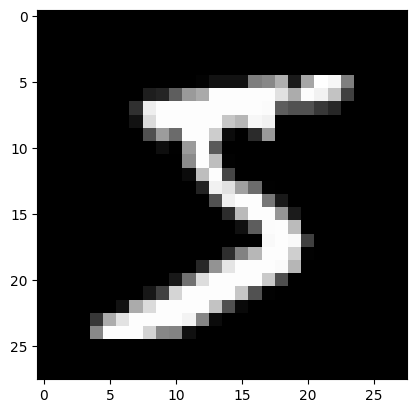

In [35]:
# training and test data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalize to have training values for pixels between 0-1.
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

print('train_x[1] raw',train_X[1][5][10:21])
pyplot.imshow(train_X[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# def findOne(x):
#   if x == 1:
#     return True
#   else:
#     return False

# results = filter(findOne, train_y)

# for y in results:
#   print(y)

# from matplotlib import pyplot
# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
#   pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
#   pyplot.show()


In [46]:
yy = copy.deepcopy(train_y)
unique_integers = list(set(yy))
unique_integers.sort()
print(unique_integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Train on MNIST

In [45]:
def one_hot_encode(number, num_classes):
    one_hot_vector = [0] * num_classes
    one_hot_vector[number] = 1
    return one_hot_vector
# convert train_y to one hot encoding
num_classes = len(unique_integers)
yy_one = [one_hot_encode(num, num_classes) for num in yy]
print(yy_one[2])
print(yy[2])

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
4


### MNIST on PyTorch
- using previous imports and preprocessing of MNIST
- Import PyTorch stuff here

#### Prepare data using Pytorch

In [65]:
from keras.datasets import mnist
from torch.utils.data import Dataset, DataLoader

import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# training and test data
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

# normalize to have training values for pixels between 0-1.
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# reshape input datasets
# train_X.shape
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

yy = copy.deepcopy(train_Y)
unique_integers = list(set(yy))
unique_integers.sort()
# print(unique_integers)
def one_hot_encode(number, num_classes):
    one_hot_vector = [0.0] * num_classes
    one_hot_vector[number] = 1.0
    return one_hot_vector
# convert output values to one hot encoding
num_classes = len(unique_integers)
train_Y = np.array([one_hot_encode(num, num_classes) for num in yy])
test_Y = np.array([one_hot_encode(num, num_classes) for num in test_Y])

# Convert to PyTorch tensor type from numpy
train_X = torch.from_numpy(train_X)
train_Y = torch.from_numpy(train_Y)
test_X = torch.from_numpy(test_X)
test_Y = torch.from_numpy(test_Y)

# for x, y in zip(train_X[:5], train_Y[:5]):
#   print('x',x)
#   print('y',y)
# class TrainDataset(Dataset):
#     def __init__(self, data):
#         self.data = data
#     def __len__(self):
#         return self.data.shape[0]
#     def __getitem__(self, ind):
#         x = self.data[ind][1:] / 255.0
#         y = self.data[ind][0]
#         return x, y
# class TestDataset(TrainDataset):
#     def __getitem__(self, ind):
#         x = self.data[ind] / 255.0
#         return x

# train_X = TrainDataset(train_X)
# train_y  = TestDataset(train_y)

# batch_size = 512
# train_loader = DataLoader(train_X, batch_size=batch_size, shuffle=True)
# test_loader  = DataLoader(train_y,  batch_size=batch_size, shuffle=False)

#### Train the Pytorch MLP Classifier

In [55]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear = nn.Linear(28*28, 10)
    def forward(self, x):
        out = self.linear(x)
        return out

model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

print(model)

MLP(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [61]:
epochs = 10

model.train()
for epoch in range(epochs):
    losses = []
    for x, y in zip(train_X, train_Y):
        optimizer.zero_grad()
        # x = x.to(device).float()
        # y = y.to(device)

        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        losses.append(loss.item())

        optimizer.step()

        # print('\tEpoch %d | Loss %6.2f' % (epoch, loss.item()))
    print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))

Epoch 0 | Loss   0.31
Epoch 1 | Loss   0.30
Epoch 2 | Loss   0.29
Epoch 3 | Loss   0.29
Epoch 4 | Loss   0.29
Epoch 5 | Loss   0.29
Epoch 6 | Loss   0.29
Epoch 7 | Loss   0.29
Epoch 8 | Loss   0.29
Epoch 9 | Loss   0.29


#### Evaluate the MLP Model

In [83]:
# run model on test set
# Evaluation phase
model.eval()
correct = 0
with torch.no_grad():  # Disable gradient calculation for efficiency
    for x,y in zip(test_X, test_Y):
      output = model(x)
      # print('output',output.argmax().item())
      # print('y',y.argmax().item())
      # Calculate evaluation metrics (accuracy, etc.)
      if(output.argmax() == y.argmax()):
        # print('output',output.argmax().item())
        # print('y',y.argmax().item())
        correct += 1
print('accuracy: '+str((correct/len(test_X))*100)+'%')

accuracy: 89.98%


### Draft 1 Gradient Descent for MNIST
- It seems like this draft the gradients are not getting through to the parameters somehow. Its being stopped!!

In [ ]:
# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [2,2,output_dim])

# forward the model to get scores
limit_x=5
# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
scores = list(map(model, inputs))
expected_outputs = yy_one[:limit_x]

iterations = 10
for iter in range(iterations):
  # Begin gradient descent iterations
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
          # layer_num = 0
          # for layer in model.layers:
            # print(f'layer {layer_num}')
            # print(layer.parameters())
            # print("len of parameters:",len(layer.parameters()))
            # layer_num += 1
          # You can also raise an exception if needed
          # raise ValueError(f"Sum of scores at index {i} is zero.")
          # How can I log the parameters if my model is fing up?
          # for p in model.parameters():
          #   print('p',p)
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # probs = [Value(0.0) if sum(scores[i]).data == 0 else scores[i][j]/sum(scores[i]) for i in range(len(scores)) for j in range(len(scores[i]))]
  # Why do I get all zeros as the outputs for certain inputs??
    # its because of relu()
    # Solution: I think it will work itself out once I start training it
  # print(probs_predicted)
  # print(expected_outputs)
  # print(np.array(probs_predicted).shape)
  # print(len(probs_predicted))

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  for yi_one, probs in zip(yy_one, probs_predicted):
    loss = []
    for k in range(len(yi_one)):
      # (actual-expected)**2
      loss.append((yi_one[i]-probs[i])**2)
    losses.append(loss)
  # print('losses',losses)
  # print('losses shape',np.array(losses).shape)
  # losses = [(yi_one-probs)**2 for yi_one, probs in zip(yy_one, probs_predicted)]

  # Back propagation
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = None
  data_loss = [sum(loss)/num_classes for loss in losses ]
  data_loss = sum(data_loss)/limit_x
  # print(data_loss)
  data_loss.backward()

  # Update parameters
  for p in model.parameters():
    p -= p.grad

Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of sc

### Draft 2 Gradient Descent for MNIST

*   Managed to get the MLP to overfit to the smaller sample size of training data



In [ ]:
# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [2,2,output_dim])

# limit the training set to 5 examples for now
limit_x=5
# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

# Begin gradient descent iterations
iterations = 100
for iter in range(iterations):
  # forward the model to get scores
  scores = list(map(model, inputs))
  # print('scores',scores)
  # print('scores.shape',np.array(scores).shape)
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
          # layer_num = 0
          # for layer in model.layers:
            # print(f'layer {layer_num}')
            # print(layer.parameters())
            # print("len of parameters:",len(layer.parameters()))
            # layer_num += 1
          # You can also raise an exception if needed
          # raise ValueError(f"Sum of scores at index {i} is zero.")
          # How can I log the parameters if my model is fing up?
          # for p in model.parameters():
          #   print('p',p)
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # probs = [Value(0.0) if sum(scores[i]).data == 0 else scores[i][j]/sum(scores[i]) for i in range(len(scores)) for j in range(len(scores[i]))]
  # Why do I get all zeros as the outputs for certain inputs??
    # its because of relu()
    # Solution: I think it will work itself out once I start training it
  # print(probs_predicted)
  # print(expected_outputs)
  # print(np.array(probs_predicted).shape)
  # print(len(probs_predicted))

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  for yi_one, probs in zip(yy_one, probs_predicted):
    loss = []
    for k in range(len(yi_one)):
      # (actual-expected)**2
      loss.append((yi_one[i]-probs[i])**2)
    losses.append(loss)
  # Calculate total loss
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = [sum(loss)/num_classes for loss in losses ]
  data_loss = sum(data_loss)/limit_x
  # print('losses',losses)
  # print('losses shape',np.array(losses).shape)
  # losses = [(yi_one-probs)**2 for yi_one, probs in zip(yy_one, probs_predicted)]

  # Back propagation
  model.zero_grad()
  data_loss.backward()
  print('Iteration '+str(iter) +' total loss: '+str(round(data_loss.data,4)*100)+'%')

  # Update parameters
  for p in model.parameters():
    # print('p.grad',p.grad)
    # print('p before',p)
    p.data -= p.grad
    # print('p after',p)
    # print()

Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 4 is zero.
Iteration 0 total loss: 45.36%
Iteration 1 total loss: 26.040000000000003%
Iteration 2 total loss: 41.349999999999994%
Iteration 3 total loss: 37.49%
Iteration 4 total loss: 35.06%
Iteration 5 total loss: 33.01%
Iteration 6 total loss: 31.22%
Iteration 7 total loss: 29.64%
Iteration 8 total loss: 28.22%
Iteration 9 total loss: 26.919999999999998%
Iteration 10 total loss: 25.72%
Iteration 11 total loss: 24.6%
Iteration 12 total loss: 23.54%
Iteration 13 total loss: 22.52%
Iteration 14 total loss: 21.54%
Iteration 15 total loss: 20.59%
Iteration 16 total loss: 19.64%
Iteration 17 total loss: 18.7%
Iteration 18 total loss: 17.75%
Iteration 19 total loss: 16.78%
Iteration 20 total loss: 15.770000000000001%
Iteration 21 total loss: 14.71%
Iteration 22 total loss: 13.569999999999999%
Iteration 23 total loss: 12.33%
Iteration 24 to

#### Figure out why gradients are not flowing to parameters with a MLP with less parameters and a toy problem

##### Downscale MNIST images

(60000, 2, 2)


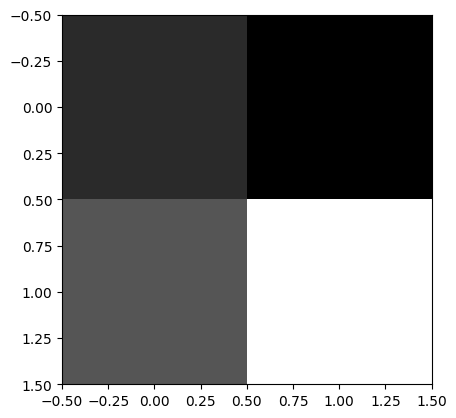

In [ ]:
import cv2
import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms

# Load MNIST dataset
mnist = copy.deepcopy(train_X)

# Define downscaling function
def downscale_image(image, scale_factor):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dim = (width, height)
    downscaled_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return downscaled_image

# Define scale factor (e.g., 0.5 for half the size)
scale_factor = 0.1

# Downscale images in MNIST dataset
downscaled_images = [downscale_image(np.array(image), scale_factor) for image in mnist]
downscaled_images = np.array(downscaled_images)

# Print shape of the downscaled images
print(downscaled_images.shape)
pyplot.imshow(downscaled_images[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
# define the MLP model
in_inputs=downscaled_images[0].shape[0]*downscaled_images[0].shape[1]
output_dim = len(unique_integers)
model = MLP(in_inputs, [2,output_dim])

# limit the training set to 5 examples for now
limit_x=5
# reshape here to flatten the 2D [downscaled_images.shape[0],downscaled_images.shape[1]] into 1D -> downscaled_images.shape[0]*downscaled_images.shape[1]
inputs = downscaled_images[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

# Begin gradient descent iterations
iterations = 10
for iter in range(iterations):
  # forward the model to get scores
  scores = list(map(model, inputs))
  print('scores',scores)
  print('scores.shape',np.array(scores).shape)
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
          # layer_num = 0
          # for layer in model.layers:
            # print(f'layer {layer_num}')
            # print(layer.parameters())
            # print("len of parameters:",len(layer.parameters()))
            # layer_num += 1
          # You can also raise an exception if needed
          # raise ValueError(f"Sum of scores at index {i} is zero.")
          # How can I log the parameters if my model is fing up?
          # for p in model.parameters():
          #   print('p',p)
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # probs = [Value(0.0) if sum(scores[i]).data == 0 else scores[i][j]/sum(scores[i]) for i in range(len(scores)) for j in range(len(scores[i]))]
  # Why do I get all zeros as the outputs for certain inputs??
    # its because of relu()
    # Solution: I think it will work itself out once I start training it
  print(probs_predicted)
  # print(expected_outputs)
  # print(np.array(probs_predicted).shape)
  # print(len(probs_predicted))

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  for yi_one, probs in zip(yy_one, probs_predicted):
    loss = []
    for k in range(len(yi_one)):
      # (actual-expected)**2
      loss.append((yi_one[i]-probs[i])**2)
    losses.append(loss)
  # Calculate total loss
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = [sum(loss)/num_classes for loss in losses ]
  data_loss = sum(data_loss)/limit_x
  # print('losses',losses)
  # print('losses shape',np.array(losses).shape)
  # losses = [(yi_one-probs)**2 for yi_one, probs in zip(yy_one, probs_predicted)]

  # Back propagation
  model.zero_grad()
  data_loss.backward()
  print('total loss:',data_loss)

  # Update parameters
  for p in model.parameters():
    # print('p.grad',p.grad)
    # print('p before',p)
    p.data -= p.grad
    # print('p after',p)
    # print()
# for l in range(len(model.layers)):
#   print(f'Layer {l}')
#   for p in model.layers[l].parameters():
#     print('p',p)

scores [[Value(data=14.761208020038612, grad=0), Value(data=-29.240798196111747, grad=0), Value(data=-5.3943238632547885, grad=0), Value(data=-1.0464944879799334, grad=0), Value(data=24.92118483231581, grad=0), Value(data=3.147339342161426, grad=0), Value(data=-38.55324612727477, grad=0), Value(data=36.02671562214486, grad=0), Value(data=-34.96476111353706, grad=0), Value(data=-2.222324062950971, grad=0)], [Value(data=17.204355661852752, grad=0), Value(data=-34.08048252686659, grad=0), Value(data=-6.287145752073221, grad=0), Value(data=-1.2197012158445395, grad=0), Value(data=29.045924072602418, grad=0), Value(data=3.6682597628581624, grad=0), Value(data=-44.934246397189334, grad=0), Value(data=41.98954638742268, grad=0), Value(data=-40.75182634188205, grad=0), Value(data=-2.590143945061899, grad=0)], [Value(data=13.096896271840654, grad=0), Value(data=-25.94392683582675, grad=0), Value(data=-4.786119130484139, grad=0), Value(data=-0.9285032593213419, grad=0), Value(data=22.11134564848

In [ ]:
print('model total parameters',len(model.parameters()))
# in_inputs
layer_len = len(model.layers)
print('layer length',layer_len)
# print('in_inputs',in_inputs)
# print('length of parameters',len(model.layers[layer_len-4].parameters()))
# counter = 0
# for l in range(len(model.layers):
#   if(p.grad != 0):
#     print('counter',counter)
#     print('p ', p)
#   counter += 1
for l in range(len(model.layers)):
  print(f'Layer {l}')
  for p in model.layers[l].parameters():
    print('p',p)

model total parameters 40
layer length 2
Layer 0
p Value(data=0.3654248334954173, grad=0.0)
p Value(data=-0.4374068669121398, grad=0.0)
p Value(data=-0.8555745462165814, grad=0.0)
p Value(data=-0.9496480928712234, grad=0.0)
p Value(data=0, grad=0.0)
p Value(data=-0.5086089169313228, grad=5.745404152435185e-15)
p Value(data=0.8058789569529698, grad=1.1379786002407855e-14)
p Value(data=-0.12017622482722823, grad=9.270362255620057e-15)
p Value(data=-0.6389466672066417, grad=6.2450045135165055e-15)
p Value(data=0, grad=1.942890293094024e-16)
Layer 1
p Value(data=0.2851531415759261, grad=0.0)
p Value(data=0.5779119841823439, grad=-16.193038476581734)
p Value(data=0, grad=-1.4408680209647295)
p Value(data=0.030763850698566575, grad=0.0)
p Value(data=-0.7234122934672151, grad=-16.193038476581734)
p Value(data=0, grad=-1.4408680209647295)
p Value(data=-0.848132684255062, grad=0.0)
p Value(data=-0.04388960273528686, grad=-16.193038476581734)
p Value(data=0, grad=-1.4408680209647295)
p Value(dat

### Draft 3: Run MLP on full MNIST training set and test on test set(turns out there is a bug in my loss)
- New problem the loss function is not optimizing for the prediction that is suppose to happen. The loss is going down but the accuracy /prediction is not getting better..
- TODO: fix my loss function here!, implement batched gradient descent

In [ ]:
len(train_X)

60000

In [ ]:
Value(2).log()

Value(data=0.6931471805599453, grad=0, _op=)

In [ ]:
# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [6,6,output_dim])

# limit training set to overfit
# on smaller test size.
limit_x=5

# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

# Begin gradient descent iterations
iterations = 100
for iter in range(iterations):
  # forward the model to get scores
  scores = list(map(model, inputs))
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  correct = 0
  # print('expected_outputs',expected_outputs)
  # print('probs_predicted',probs_predicted)
  # print('shape of probs_predicted',np.array(probs_predicted).shape)
  for yi_one, probs in zip(expected_outputs, probs_predicted):
    loss = []
    probs_list = [p.data for p in probs]
    print('yi_one',yi_one)
    print('probs_list',probs_list)
    print('yi_one.index(max(yi_one))',yi_one.index(max(yi_one)))
    print('probs_list.index(max(probs_list))',probs_list.index(max(probs_list)))
    if(yi_one.index(max(yi_one)) == probs_list.index(max(probs_list))):
      correct += 1
    for k in range(len(yi_one)):
      loss.append((yi_one[k]-probs[k])**2)
    losses.append(loss)
  # Calculate total loss
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = [sum(loss) for loss in losses ]
  data_loss = sum(data_loss)/limit_x

  # Back propagation
  model.zero_grad()
  data_loss.backward()
  print('Iteration '+str(iter) +' total loss: '+str(data_loss.data))
  # print('correct',correct)
  # print('limit_x',limit_x)
  # print('correct/limit_x',correct/limit_x)
  print('Accuracy:'+str(correct/limit_x))
  # Update parameters
  for p in model.parameters():
    p.data -= p.grad

yi_one [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
probs_list [0.16535677076612484, 0.1800848730198886, 0.17284940061499218, 0.154763877300878, 0.04760576070154923, 0.05330214513224734, 0.056708955580511054, 0.0988851278899739, 0.16938976493741248, -0.09894667594357763]
yi_one.index(max(yi_one)) 5
probs_list.index(max(probs_list)) 1
yi_one [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
probs_list [0.14055137118341016, 0.21871312863623024, 0.23468072841687193, 0.13009321648459654, 0.11592329693403318, 0.1529564095569175, 0.02050019596306311, 0.1494686555825496, -0.011814752557464829, -0.15107225020020731]
yi_one.index(max(yi_one)) 0
probs_list.index(max(probs_list)) 2
yi_one [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
probs_list [0.16535677076612482, 0.18008487301988857, 0.17284940061499218, 0.154763877300878, 0.04760576070154923, 0.05330214513224733, 0.05670895558051105, 0.0988851278899739, 0.16938976493741245, -0.09894667594357762]
yi_one.index(max(yi_one)) 4
probs_list.index(max(probs_list)) 1
yi_one [0, 1, 0, 0, 0, 0, 0, 0,

#### Draft 3b.
-  make the model train each example one by one.
- Use softmax to get probabilities instead of dividing by the total.

In [ ]:
# Import from local Value Class
# from engine import Value
# from nn import MLP

def softmax(scores):
    # max_score = max(scores, key=lambda x: x.data)
    norm_scores = [(score) for score in scores]
    exp_scores = [norm_score.exp() for norm_score in norm_scores]
    sum_exp_scores = sum(exp_scores)
    return [exp_score / sum_exp_scores for exp_score in exp_scores]

# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [6,6,output_dim])

# limit training set to overfit
# on smaller test size.
limit_x=5

# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

parameters_data_log = []
parameters_grad_log = []
# Begin gradient descent iterations
iterations = 10
for iter in range(iterations):
  parameters_data_log.append([])
  parameters_grad_log.append([])
  # forward the model one input at a time to get scores
  correct = 0
  for i_input in range(len(inputs)):
    scores = model(inputs[i_input])
    # print('raw scores',scores)
    probs_predicted = softmax(scores)
    # Loss for a single input
    yi_one = expected_outputs[i_input]
    loss = []
    probs_list = [p.data for p in probs_predicted]

    if(yi_one.index(max(yi_one)) == probs_list.index(max(probs_list))):
      correct += 1

    # mean squared error loss
    for k in range(len(yi_one)):
      loss.append((yi_one[k]-probs_predicted[k])**2)
    total_loss = sum(loss)/len(loss)

    # print the probabilities at the last iteration
    if iter == iterations-1:
      print('probabilities predicted:',probs_list)
      print('predicted value:',probs_list.index(max(probs_list)))
      print('actual value:',yi_one.index(max(yi_one)))

    # Back propagation
    model.zero_grad()
    total_loss.backward()

    # Update parameters
    for p in model.parameters():
      parameters_data_log[iter].append(p.data)
      parameters_grad_log[iter].append(p.grad)
      p.data -= p.grad
  print('Iteration '+str(iter) +' total loss: '+str(total_loss.data))
  print('Accuracy:'+str(correct/len(inputs)))

#### Draft 3c.
- Instead of Mean Squared Error loss use negative log likelihood.
  - This provides better numerical stability because exact number representation is hard for computers especially when you get to the decimal numbers
  - I have the problem of vanishing gradients. The MLP is not training that well

In [18]:
def softmax(scores):
    max_score = max(scores, key=lambda x: x.data)
    norm_scores = [(score-max_score) for score in scores]
    exp_scores = [norm_score.exp() for norm_score in norm_scores]
    sum_exp_scores = sum(exp_scores)
    return [exp_score / sum_exp_scores for exp_score in exp_scores]

# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [6,output_dim])

# limit training set to overfit
# on smaller test size.
limit_x=5

# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

parameters_data_log = []
parameters_grad_log = []
# Begin gradient descent iterations
iterations = 25
for iter in range(iterations):
  parameters_data_log.append([])
  parameters_grad_log.append([])
  # forward the model one input at a time to get scores
  correct = 0
  for i_input in range(len(inputs)):
    scores = model(inputs[i_input])
    # print('raw scores',scores)
    probs_predicted = softmax(scores)
    # Loss for a single input
    yi_one = expected_outputs[i_input]
    loss = []
    probs_list = [p.data for p in probs_predicted]

    if(yi_one.index(max(yi_one)) == probs_list.index(max(probs_list))):
      correct += 1

    #  Negative Log Likelihood loss
    print('probs_predicted',probs_predicted)
    for k in range(len(yi_one)):
      loss.append(-1*((yi_one[k]*probs_predicted[k].log())+(1-yi_one[k])*(1-probs_predicted[k]).log()))
    total_loss = sum(loss)/len(loss)

    # print the probabilities at the last iteration
    if iter == iterations-1:
      print('probabilities predicted:',probs_list)
      print('predicted value:',probs_list.index(max(probs_list)))
      print('actual value:',yi_one.index(max(yi_one)))

    # Back propagation
    model.zero_grad()
    total_loss.backward()

    # Update parameters
    for p in model.parameters():
      parameters_data_log[iter].append(p.data)
      parameters_grad_log[iter].append(p.grad)
      p.data -= p.grad
  print('Iteration '+str(iter) +' total loss: '+str(total_loss.data))
  print('Accuracy:'+str(correct/len(inputs)))

probs_predicted [Value(data=0.00022045142138457747, grad=0, _op=*), Value(data=7.469473489206431e-06, grad=0, _op=*), Value(data=0.039432921457948016, grad=0, _op=*), Value(data=5.332798716930786e-06, grad=0, _op=*), Value(data=0.003332836160880616, grad=0, _op=*), Value(data=0.5595572970682189, grad=0, _op=*), Value(data=3.609035470806245e-08, grad=0, _op=*), Value(data=7.14647917124168e-07, grad=0, _op=*), Value(data=0.39744235796886096, grad=0, _op=*), Value(data=5.82912229042107e-07, grad=0, _op=*)]
probs_predicted [Value(data=0.0010815053710921349, grad=0, _op=*), Value(data=0.0008016560645327472, grad=0, _op=*), Value(data=1.1617562443122412e-07, grad=0, _op=*), Value(data=0.002106076565763912, grad=0, _op=*), Value(data=0.006143326775580793, grad=0, _op=*), Value(data=2.0963797349027633e-61, grad=0, _op=*), Value(data=8.525257512961252e-13, grad=0, _op=*), Value(data=0.9898673190461423, grad=0, _op=*), Value(data=8.599453858998517e-44, grad=0, _op=*), Value(data=4.11047624442715

ZeroDivisionError: float division by zero

#### Draft 3d. Fix Vanishing Gradient Problem

In [12]:
def softmax(scores):
    max_score = max(scores, key=lambda x: x.data)
    norm_scores = [(score-max_score) for score in scores]
    exp_scores = [norm_score.exp() for norm_score in norm_scores]
    sum_exp_scores = sum(exp_scores)
    return [exp_score / sum_exp_scores for exp_score in exp_scores]

# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [70,50,output_dim])

# limit training set to overfit
# on smaller test size.
limit_x=5

# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

parameters_data_log = []
parameters_grad_log = []
# Begin gradient descent iterations
iterations = 25
for iter in range(iterations):
  parameters_data_log.append([])
  parameters_grad_log.append([])
  # forward the model one input at a time to get scores
  correct = 0
  for i_input in range(len(inputs)):
    scores = model(inputs[i_input])
    # print('raw scores',scores)
    probs_predicted = softmax(scores)
    # Loss for a single input
    yi_one = expected_outputs[i_input]
    loss = []
    probs_list = [p.data for p in probs_predicted]

    if(yi_one.index(max(yi_one)) == probs_list.index(max(probs_list))):
      correct += 1

    #  Negative Log Likelihood loss
    print('probs_predicted',probs_predicted)
    for k in range(len(yi_one)):
      loss.append(-1*((yi_one[k]*probs_predicted[k].log())+(1-yi_one[k])*(1-probs_predicted[k]).log()))
    total_loss = sum(loss)/len(loss)

    # print the probabilities at the last iteration
    if iter == iterations-1:
      print('probabilities predicted:',probs_list)
      print('predicted value:',probs_list.index(max(probs_list)))
      print('actual value:',yi_one.index(max(yi_one)))

    # Back propagation
    model.zero_grad()
    total_loss.backward()

    # Update parameters
    for p in model.parameters():
      parameters_data_log[iter].append(p.data)
      parameters_grad_log[iter].append(p.grad)
      p.data -= p.grad
  print('Iteration '+str(iter) +' total loss: '+str(total_loss.data))
  print('Accuracy:'+str(correct/len(inputs)))

probs_predicted [Value(data=1.779703687980097e-73, grad=0, _op=*), Value(data=2.530106795396246e-62, grad=0, _op=*), Value(data=2.7276437095978546e-90, grad=0, _op=*), Value(data=4.691216176585868e-65, grad=0, _op=*), Value(data=3.4945807829883744e-83, grad=0, _op=*), Value(data=1.956849627354811e-51, grad=0, _op=*), Value(data=1.0, grad=0, _op=*), Value(data=8.540226121862547e-46, grad=0, _op=*), Value(data=4.648861919772581e-57, grad=0, _op=*), Value(data=3.226305625867261e-30, grad=0, _op=*)]


ValueError: math domain error

In [14]:
for p in model.parameters():
  print(p.data)

Streaming output truncated to the last 5000 lines.
0.47021211413647857
0.27840701276938695
-0.9127237109505109
-0.21900862374640484
-0.4649978777121535
0.809716979474776
-0.8263329646244013
-0.9686991960382005
-0.07926803705687657
-0.12926752221343518
-0.2961528485452134
-0.7792584771660787
-0.6292788082685388
-0.18090923767862432
0.9150892409215066
-0.8806158630719596
0.27037553430897066
-0.5675622279257282
0.04334972192573461
-0.6006289767543924
-0.18877370182531306
0.9033738774294819
0.7801035268591152
-0.6088514616417442
-0.19366654511365056
0.019423182211711465
-0.5799075056261707
-0.23039960830509232
-0.20001150018308467
0.14868106866590436
0.231642243559947
0.7413032608019123
0.6799691449176115
0.2812668953297963
0.6802664006941801
-0.7707787248595706
-0.8185689521592576
-0.1729272814580265
0.62950397750664
0.1436165163417662
0.7554585875522979
0.12836210826005523
0.7110068607776483
0.06838612779223041
-0.34021686308697974
-0.08862172380223576
0.00640712705997859
-0.415310642923

In [9]:
print('This gives the mean of gradients and parameters for each iteration:')
# print(parameters_grad_log)
print('mean of gradients',np.mean(parameters_grad_log,axis=1))
print('mean of parameters',np.mean(parameters_data_log,axis=1))
# Value(0).draw_dot(total_loss)

# topo = []
# visited = set()
# def build_topo(v):
#     if v not in visited:
#         visited.add(v)
#         for child in v._prev:
#             print('child:',child)
#             build_topo(child)
#         topo.append(v)
# build_topo(total_loss)
# np.array(parameters_grad_log).shape
# parameters_data_log
# np.all(parameters_grad_log)
# for arr in parameters_grad_log:
#   for e in arr:
#     if e != 0:
#       print('e',e)
#       print('no')

This gives the mean of gradients and parameters for each iteration:
mean of gradients [ 1.22146266e-02 -1.45165144e-21 -1.01615601e-21 -2.90330289e-22
 -1.59681659e-21  2.90330289e-22 -1.74198173e-21  1.16132116e-21
  1.45165144e-22  1.30648630e-21  0.00000000e+00 -1.45165144e-22
 -1.45165144e-21 -2.90330289e-22 -5.80660578e-22 -1.45165144e-22
  2.90330289e-22 -5.80660578e-22 -1.45165144e-22  7.25825722e-22
  1.01615601e-21 -1.45165144e-21  0.00000000e+00  8.70990867e-22
 -5.80660578e-22]
mean of parameters [-0.03225236 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615
 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615
 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615
 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615 -0.06342615
 -0.06342615]


In [10]:
# from engine import Value
x = Value(100)
y = Value(50)
z = x + y
m = z.log()
z.backward()
print(m)
Value(0).draw_dot(m)

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            print('child:',child)
            build_topo(child)
        topo.append(v)
build_topo(m)


Value(data=5.0106352940962555, grad=0, _op=math.log)
child: Value(data=150, grad=1, _op=+)
child: Value(data=100, grad=1, _op=)
child: Value(data=50, grad=1, _op=)


#### Why is back propping through softmax giving back zero gradients?
- Why does exp_score have 0 gradients?
- THE VALUES ARE TOO BIG and the gradients end up being zero because of exp(val1)/(exp(val1)+exp(val2)+exp(val3)). The answer is to normalize my inputs to be between 0-1 instead of 0-255.
  - That did not work either

- Its because I am doing total.backwards(). total is just a sum of the softmax() output.
  - And the gradients of the expression for **probs** and **sum_exp_scores** cancel each other out.

In [ ]:
import torch
def cmp(s, dt, t):
  ex = torch.all(dt == t.grad).item()
  app = torch.allclose(dt, t.grad)
  maxdiff = (dt - t.grad).abs().max().item()
  print(f'{s:15s} | exact: {str(ex):5s} | approximate: {str(app):5s} | maxdiff: {maxdiff}')

total: Value(data=1.0, grad=1, _op=+)
result: [Value(data=0.17994244568072545, grad=1, _op=*), Value(data=0.12061902847246941, grad=1, _op=*), Value(data=0.29372297274308784, grad=1, _op=*), Value(data=0.2428968951588938, grad=1, _op=*), Value(data=0.16281865794482353, grad=1, _op=*)]
sum_exp_scores Value(data=9.162492287258775, grad=-0.10914061028903514, _op=+)
exp_scores: [Value(data=1.6487212707001282, grad=-2.7755575615628914e-17, _op=e), Value(data=1.1051709180756477, grad=-2.7755575615628914e-17, _op=e), Value(data=2.691234472349262, grad=-2.7755575615628914e-17, _op=e), Value(data=2.225540928492468, grad=-2.7755575615628914e-17, _op=e), Value(data=1.4918246976412703, grad=-2.7755575615628914e-17, _op=e)]
scores_value [Value(data=0.5, grad=-4.5761207898013195e-17, _op=), Value(data=0.1, grad=-3.067465498484267e-17, _op=), Value(data=0.99, grad=-7.469676189667712e-17, _op=), Value(data=0.8, grad=-6.177116952644967e-17, _op=), Value(data=0.4, grad=-4.140645320064502e-17, _op=)]


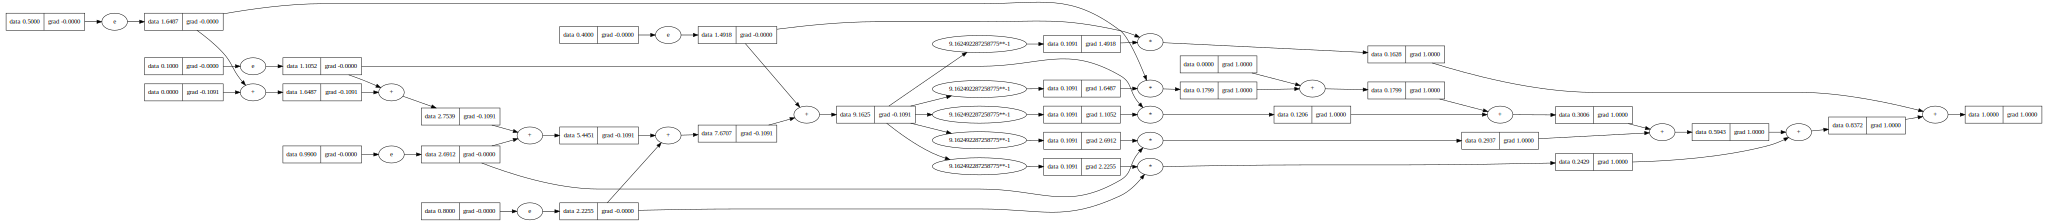

In [ ]:
# Import from local Value Class
from engine import Value


# def softmax(scores):
#     max_score = max(scores, key=lambda x: x.data)
#     exp_scores = [math.exp (score.data - max_score.data) for score in scores]
#     sum_exp_scores = sum(exp_scores)
#     return [Value(exp_score / sum_exp_scores) for exp_score in exp_scores]

# Trying to figure out softmax to make sure
# that the gradients will flow through
scores = [0.5,0.1,0.99,0.8,0.4]
scores_value = [Value(score) for score in scores]
# max_score = max(scores_value, key=lambda x: x.data)
exp_scores = [(score).exp() for score in scores_value]
sum_exp_scores = sum(exp_scores)
result = [exp_score/sum_exp_scores for exp_score in exp_scores]
# result = softmax(scores_value)
total = sum(result)
total.backward() # ---> my gradient at scores_value is zero because I am going backwards from total which is just a sum of the softmax
# Actually I think its because the backward() starts at total and doesn't have any kind of loss function in between
print('total:',total)
print('result:',result)
print('sum_exp_scores',sum_exp_scores)
print('exp_scores:',exp_scores)
# print('max_score',max_score)
print('scores_value',scores_value)
total.draw_dot(total)

In [ ]:
# using pytorch
import torch

# Trying to figure out softmax to make sure
# that the gradients will flow through
scores = torch.tensor([0.5,0.1,0.99,0.8,0.4], requires_grad=True)
# scores = torch.randn((5,), requires_grad=True)
scores_max=torch.max(scores)
norm_scores = (scores-scores_max)
exp_scores = norm_scores.exp()
sum_exp_scores = exp_scores.sum(0, keepdim=True)
sum_exp_scores_inv = sum_exp_scores ** -1
probs = exp_scores * sum_exp_scores_inv
logprobs = probs.log()
loss = -logprobs.mean()
# total = probs.sum() # doing a total and then having the total as the loss led to gradients cancelling each other out.
  # Why did the gradients cancel each other out? Is there some wisdom to draw from this?
for t in [scores, scores_max, norm_scores, exp_scores, sum_exp_scores,
            sum_exp_scores_inv, probs, logprobs, loss]:
  t.retain_grad()
loss.backward()
print('loss.grad',loss.grad)
print('loss:',loss)
print('logprobs',logprobs)
print('probs:',probs)
print('sum_exp_scores',sum_exp_scores)
print('exp_scores:',exp_scores)
print('norm_scores',norm_scores)
print('scores_max',scores_max)
print('scores',scores)
print('scores.grad',scores.grad)

loss.grad tensor(1.)
loss: tensor(1.6571, grad_fn=<NegBackward0>)
logprobs tensor([-1.7151, -2.1151, -1.2251, -1.4151, -1.8151], grad_fn=<LogBackward0>)
probs: tensor([0.1799, 0.1206, 0.2937, 0.2429, 0.1628], grad_fn=<MulBackward0>)
sum_exp_scores tensor([3.4046], grad_fn=<SumBackward1>)
exp_scores: tensor([0.6126, 0.4107, 1.0000, 0.8270, 0.5543], grad_fn=<ExpBackward0>)
norm_scores tensor([-0.4900, -0.8900,  0.0000, -0.1900, -0.5900], grad_fn=<SubBackward0>)
scores_max tensor(0.9900, grad_fn=<MaxBackward1>)
scores tensor([0.5000, 0.1000, 0.9900, 0.8000, 0.4000], requires_grad=True)
scores.grad tensor([-0.0201, -0.0794,  0.0937,  0.0429, -0.0372])


In [ ]:
# print('logprobs.shape',logprobs.shape[0])
dlogprobs = -1/logprobs.shape[0] * torch.ones_like(logprobs)
dprobs = (1.0/probs)*dlogprobs
d_sum_exp_scores_inv = (exp_scores*dprobs).sum()
d_sum_exp_scores = -sum_exp_scores**-2 * d_sum_exp_scores_inv#(-sum_exp_scores**-2 * exp_scores*dresult).sum()
d_exp_scores = torch.ones_like(exp_scores)*d_sum_exp_scores + sum_exp_scores_inv * dprobs

# print('dresult==result',dresult==result.grad)
# print('dresult',dresult)
# print('sum_exp_scores**-1',sum_exp_scores**-1)
# print('sum_exp_scores',sum_exp_scores.grad)
# print('d_sum_exp_scores',d_sum_exp_scores)
# print('exp_scores.grad',exp_scores.grad)
print('d_exp_scores',d_exp_scores) # ---> its 0s everywhere!!!
print('torch.ones_like(exp_scores)*d_sum_exp_scores',torch.ones_like(exp_scores)*d_sum_exp_scores)
print('sum_exp_scores**-1 * dprobs',sum_exp_scores**-1 * dprobs)
print('')
# When we did total = probs.sum() the gradient for exp_scores is zero
  # because the Augmend and addend for exp_scores gradient cancels
  # for gradient sum_exp_scores=exp_scores.sum() and gradient for probs = exp_scores*sum_exp_scores_inv cancels out

cmp('logprobs',dlogprobs, logprobs)
cmp('probs',dprobs, probs)
cmp('sum_exp_scores_inv',d_sum_exp_scores_inv, sum_exp_scores_inv)
cmp('sum_exp_scores',d_sum_exp_scores, sum_exp_scores)
cmp('exp_scores',d_exp_scores, exp_scores)

d_exp_scores tensor([-0.0327, -0.1933,  0.0937,  0.0519, -0.0671], grad_fn=<AddBackward0>)
torch.ones_like(exp_scores)*d_sum_exp_scores tensor([0.2937, 0.2937, 0.2937, 0.2937, 0.2937], grad_fn=<MulBackward0>)
sum_exp_scores**-1 * dprobs tensor([-0.3265, -0.4870, -0.2000, -0.2418, -0.3608], grad_fn=<MulBackward0>)

logprobs        | exact: True  | approximate: True  | maxdiff: 0.0
probs           | exact: False | approximate: True  | maxdiff: 5.960464477539063e-08
sum_exp_scores_inv | exact: True  | approximate: True  | maxdiff: 0.0
sum_exp_scores  | exact: True  | approximate: True  | maxdiff: 0.0
exp_scores      | exact: False | approximate: True  | maxdiff: 2.9802322387695312e-08


In [ ]:
# using Mean Squared Error Loss
# using pytorch
import torch

# Trying to figure out softmax to make sure
# that the gradients will flow through
scores = torch.tensor([0.5,0.1,0.99,0.8,0.4], requires_grad=True)
actual = torch.tensor([0,1,1,0,0], requires_grad=False)

# softmax
scores_max=torch.max(scores)
norm_scores = (scores-scores_max)
exp_scores = norm_scores.exp()
sum_exp_scores = exp_scores.sum(0, keepdim=True)
sum_exp_scores_inv = sum_exp_scores ** -1
probs = exp_scores * sum_exp_scores_inv

# mean squared error loss
loss = ((actual-probs)**2).sum() / len(actual)

# backprop
for t in [scores, scores_max, norm_scores, exp_scores, sum_exp_scores,
            sum_exp_scores_inv, probs, logprobs, loss]:
  t.retain_grad()
loss.backward()
print('loss.grad',loss.grad)
print('loss:',loss)
print('logprobs',logprobs)
print('probs:',probs)
print('sum_exp_scores',sum_exp_scores)
print('exp_scores:',exp_scores)
print('norm_scores',norm_scores)
print('scores_max',scores_max)
print('scores',scores)
print('actual',actual)
print('scores.grad',scores.grad)

loss.grad tensor(1.)
loss: tensor(0.2780, grad_fn=<DivBackward0>)
logprobs tensor([-1.7151, -2.1151, -1.2251, -1.4151, -1.8151], grad_fn=<LogBackward0>)
probs: tensor([0.1799, 0.1206, 0.2937, 0.2429, 0.1628], grad_fn=<MulBackward0>)
sum_exp_scores tensor([3.4046], grad_fn=<SumBackward1>)
exp_scores: tensor([0.6126, 0.4107, 1.0000, 0.8270, 0.5543], grad_fn=<ExpBackward0>)
norm_scores tensor([-0.4900, -0.8900,  0.0000, -0.1900, -0.5900], grad_fn=<SubBackward0>)
scores_max tensor(0.9900, grad_fn=<MaxBackward1>)
scores tensor([0.5000, 0.1000, 0.9900, 0.8000, 0.4000], requires_grad=True)
actual tensor([0, 1, 1, 0, 0])
scores.grad tensor([ 0.0270, -0.0330, -0.0600,  0.0426,  0.0233])


In [ ]:
# manual backprop for mean squared error loss
# did not need to do this because this works fine and does not have a vanishing gradient problem
# at least not right away

### Draft 4: Put together a working implementation of MNIST that trains on all the data with mini-batching. And then run a test on the test data.
- Draft 3 has the vanishing gradients problem and that is where I stopped on 09/02/24